# MATH 104.1: Coding Exercise 1 (Linear Regression)
Submitted by Val Allen U. Eltagonde and Franz Andrei A. Layug

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## 0️⃣ Importing the data

In [2]:
df = pd.read_csv('house_pricing.csv')
df.head()

,HOUSE_ID,floor_area,distance_to_cc,house_age,number_of_rooms,number_of_baths,house_price
0,H0001,52.16,11.85,44,6,1.0,269.35
1,H0002,215.95,15.89,40,2,3.0,720.86
2,H0003,191.86,13.67,45,2,3.0,672.68
3,H0004,239.91,26.34,11,5,3.5,873.12
4,H0005,113.07,14.69,32,5,1.5,466.75


## 1️⃣ Splitting the data into train and test sets

In [3]:
X = df[['floor_area', 'distance_to_cc', 'house_age', 'number_of_rooms', 'number_of_baths']]
y = df[['house_price']]
train_size = 0.8
test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, train_size=train_size, random_state=42)

## 2️⃣ Scaling the training data

In [4]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train_scaled = scaler.fit_transform(y_train)
y_test_scaled = scaler.transform(y_test)

# Redefine as dataframes to preserve column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

## 3️⃣ Performing PCA on the raw and the scaled data

In [5]:
# Raw
pca_raw = PCA()
X_train_pca = pca_raw.fit_transform(X_train)
X_test_pca = pca_raw.transform(X_test)

In [6]:
pca_raw.explained_variance_ratio_.round(3)

array([0.936, 0.059, 0.005, 0.   , 0.   ])

💡 Observation: PCA components 1 to 2 explain at least 95% of the variance in the data.

In [7]:
component_cutoff = 2 # based on observation
X_train_reduced = X_train_pca[:,:component_cutoff]
X_test_reduced = X_test_pca[:,:component_cutoff]

In [8]:
# Scaled
pca_scaled = PCA()
X_train_scaled_pca = pca_scaled.fit_transform(X_train_scaled)
X_test_scaled_pca = pca_scaled.transform(X_test_scaled)

In [9]:
pca_scaled.explained_variance_ratio_.round(3)

array([0.486, 0.299, 0.212, 0.003, 0.   ])

💡 Observation: PCA components 1 to 3 explain at least 95% of the variance in the data.

In [10]:
component_cutoff = 3 # based on observation
X_train_scaled_reduced = X_train_scaled_pca[:,:component_cutoff]
X_test_scaled_reduced = X_test_scaled_pca[:,:component_cutoff]

## 4️⃣ Creating a Python method for model training and evaluation

In [37]:
# Linear Regression Model Training and Evaluation

class LinearRegression_MTE:
    def __init__(self, training_input, training_output, test_input, test_output, dataset_name):
        self.X_train = training_input
        self.y_train = training_output
        self.X_test = test_input
        self.y_test = test_output
        self.name = dataset_name

    def get_training_model(self):
        self.model = LinearRegression()
        return self.model.fit(self.X_train, self.y_train)

    def get_predictions(self):
        return self.model.predict(self.X_test)

    def get_MSE(self):
        return mean_squared_error(self.y_test, self.get_predictions())

    def get_R2(self):
        return r2_score(self.y_test, self.get_predictions())

    def display_predictions(self):
        plt.figure(figsize=(7, 5.5))
        plt.scatter(self.y_test, self.get_predictions())
        plt.title(f'True Values vs Linear Regression Predictions using {self.name}')
        plt.xlabel('True values')
        plt.ylabel('Predicted values')
        plt.text(1,1,f'Mean Squared Error = {round(self.get_MSE(),5)}\nCoefficient of Determination = {round(self.get_R2(),5)}', fontsize=12)
        plt.show()

## 5️⃣ Apply linear regression and evaluate performance per dataset

### 🔴 Raw (unscaled) data

In [38]:
df = LinearRegression_MTE(X_train, y_train, X_test, y_test, dataset_name='Raw (unscaled) data')

In [39]:
df_model = df.get_training_model()
df_model

LinearRegression()

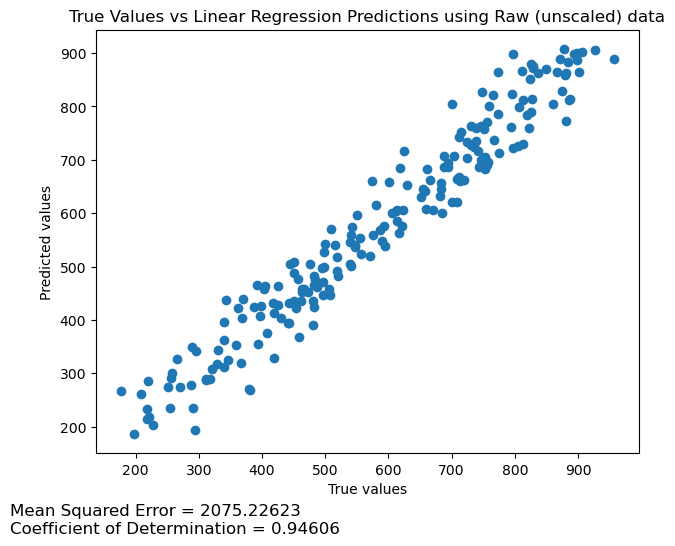

In [40]:
df.display_predictions()

### 🟠 Reduced version of the training data (via PCA)

In [41]:
df = LinearRegression_MTE(X_train_reduced, y_train, X_test_reduced, y_test, dataset_name='PCA-Reduced training data')

In [42]:
df_model = df.get_training_model()
df_model

LinearRegression()

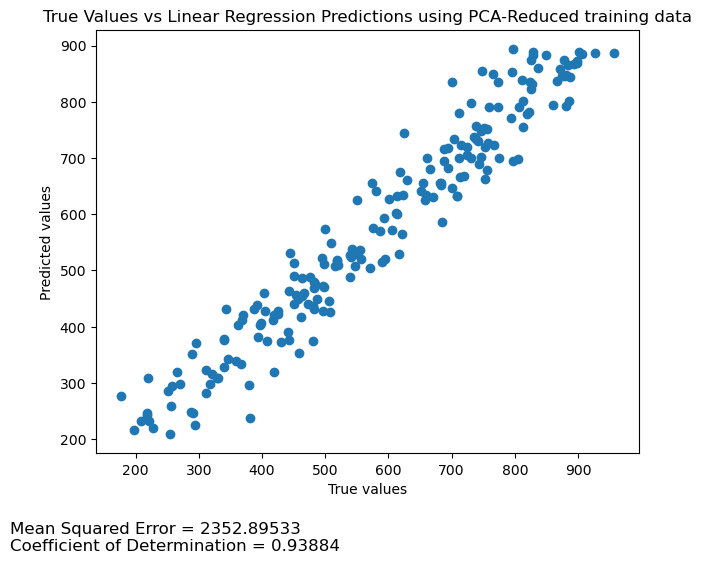

In [43]:
df.display_predictions()

### 🟡 Scaled data

In [44]:
df = LinearRegression_MTE(X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, dataset_name='Scaled data')

In [45]:
df_model = df.get_training_model()
df_model

LinearRegression()

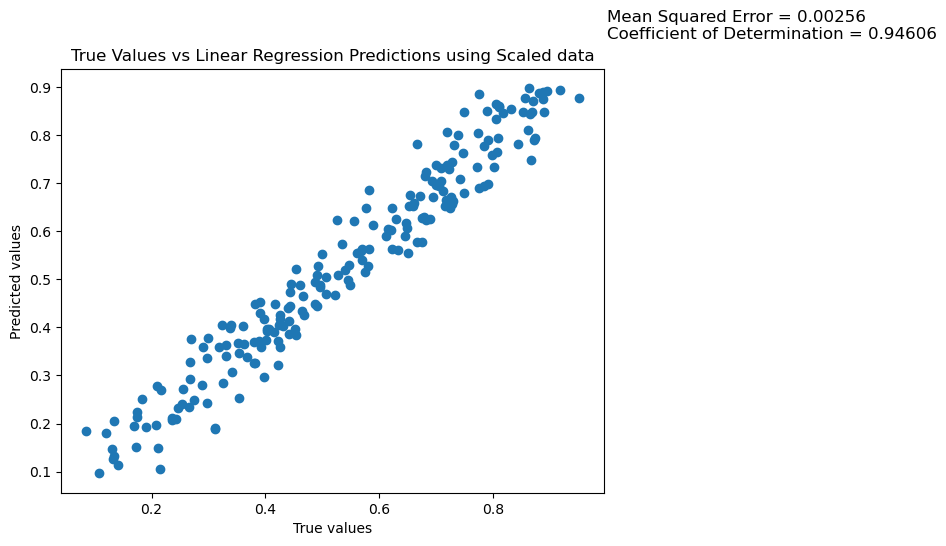

In [46]:
df.display_predictions()

### 🟢 Scaled and PCA-reduced data

In [47]:
df = LinearRegression_MTE(X_train_scaled_reduced, y_train_scaled, X_test_scaled_reduced, y_test_scaled, dataset_name='Scaled and PCA-reduced data')

In [48]:
df_model = df.get_training_model()
df_model

LinearRegression()

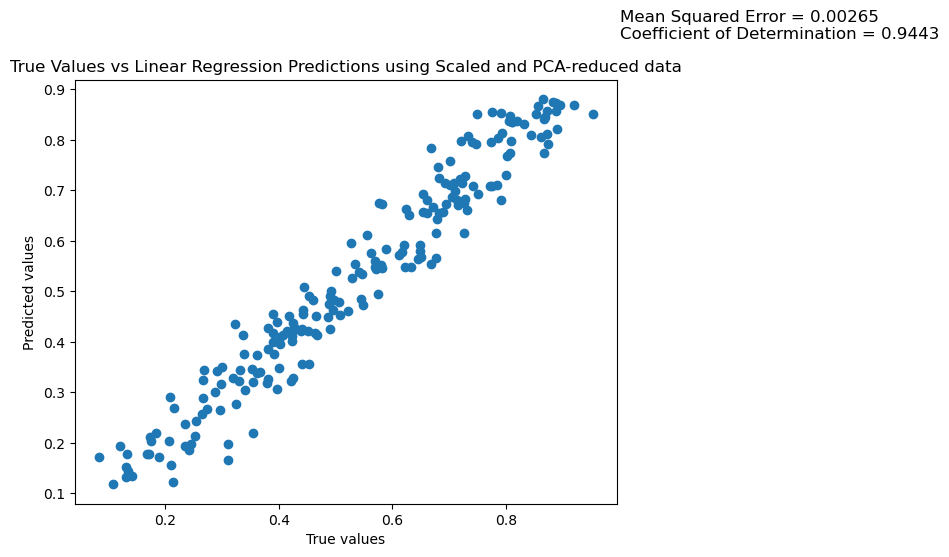

In [49]:
df.display_predictions()

## 📈 Insighting